### Exercise 6.13: Wien's displacement constant

Planck's radiation law tells us that the intensity of radiation per unit area and per unit wavelength $\lambda$ from a black body at temperature $T$ is

$$ I(\lambda) = \frac{2\pi hc^2}{e^{\frac{hc}{\lambda k_BT}}-1} $$

where $h$ is Planck's constant, $c$ is the speed of light, and $k_B$ is Boltzmann's constant.

<div class="alert alert-block alert-success">
<b>Tip:</b> Recall from the lecture that the most straightforward method to find a root of any function is the bisection method or binary method. To practice this, we are going to find the maximum of a function.
</div>

In [1]:
import numpy as np
import scipy.constants as sp
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

Note that by differentiating that the wavelength $\lambda$ at which the emitted radiation is strongest is the solution of the equation

$$ 5e^{-\frac{hc}{\lambda k_BT}} + \frac{hc}{\lambda k_BT} - 5 = 0$$

Making the substitution

$$ x = \frac{hc}{\lambda k_BT} $$

and we can show that the wavelength of maximum radiation obeys the Wien displacement law

$$ \lambda = \frac{b}{T} $$

where the so-called *Wien displacement constant* is $b=\frac{hc}{k_Bx}$, and $x$ is the solution to the nonlinear equation

$$ 5e^{-x} + x - 5 = 0$$

<div class="alert alert-block alert-info">
Write a program to solve this equation to an accuracy $\epsilon=10^{-6}$ using the binary search method, and hence find a value for the displacement constant $b$.
</div>

In [2]:
def nonlinear_eq(x):
    return 5*np.exp(-x) + x - 5

In [3]:
def midpoint(left_point, right_point):
    return (left_point + right_point)/2

In [4]:
# While loop iterates until the distance between the points is less than the accuracy value
accuracy = 1e-6 

def bisection_func(a, b):
    left_point = a
    right_point = b
    midpt = midpoint(left_point, right_point)
    
    # Checks if f(a) and f(b) have opposite signs
    if nonlinear_eq(a)*nonlinear_eq(b) >= 0:
        print("Bisection method is not applicable -- zero or even number of crossings found")
        return np.NaN
    
    # Iterates over the function until accuracy is met
    while right_point - midpt > accuracy:
        if nonlinear_eq(a)*nonlinear_eq(midpt) < 0: # Crossing has occured
            right_point = midpt 
        else:
            left_point = midpt
        midpt = midpoint(left_point, right_point)
    return midpt

In [5]:
solution = bisection_func(4,6)

def wien_constant(solution):
    Wien = (sp.h*sp.c)/(sp.Boltzmann*solution)
    return Wien

In [6]:
print("The calculated Wien displacement constant is {:.7f} while the actual value is {:.7f}.".format(wien_constant(solution), sp.Wien))

The calculated Wien displacement constant is 0.0028978 while the actual value is 0.0028978.


In [7]:
b = wien_constant(solution)
sun_wavelength = 502e-9 # Peak wavelength in the sun's emitted radiation in meters

def surface_temp(Lambda):
    temperature = b/Lambda
    return temperature

In [8]:
print("The estimated surface temperature of the Sun is {:.0f} K.".format(surface_temp(sun_wavelength)))

The estimated surface temperature of the Sun is 5772 K.


<div class="alert alert-block alert-info">
Plot the temperature $T(\lambda)$ for peak wavelengths $\lambda$ within the visible range, and indicate how the surface temperature of certain stars fall within this curve. 
</div>

In [9]:
# Array of wavelengths of up to 3 micrometers and their corresponding temperatures in Kelvin
# colortemp_array = np.array([surface_temp(Lambda) for Lambda in wavelength_array])

wavelength_array = np.arange(0, 3e-6, 1e-9)[1:] # [1:] removes the first element

In [10]:
# Spectral radiance or intensity as defined on the book
def spectral_radiance(Lambda, T):
    intensity = (2*np.pi*sp.h*((sp.c)**2)*(Lambda)**(-5))/(np.exp((sp.h*sp.c)/(Lambda*T*sp.Boltzmann)))
    return intensity

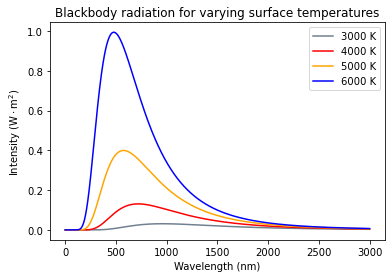

In [11]:
# Initializes an array that will be needed for the plotting
colortemp_array = np.array([3000, 4000, 5000, 6000])
count = colortemp_array.size

plot_colors = ["slategrey","red","orange","blue"]

for i, colors in zip(range(count), plot_colors):
    plt.plot(wavelength_array*1e9, spectral_radiance(wavelength_array, colortemp_array[i])*1e-14, color = plot_colors[i], label = "{} K".format(colortemp_array[i]))
    plt.xlabel(r"Wavelength (nm)")
    plt.ylabel(r"Intensity ($\mathrm{W \cdot m^2}$)")
    plt.title("Blackbody radiation for varying surface temperatures")
    plt.legend()

plt.savefig("blackbody radiation.png", dpi=1000)

***

Note that the visible light spectrum ranges from 380 nm to 740 nm.

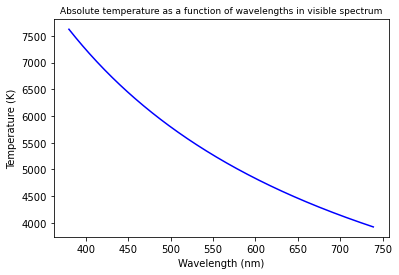

In [12]:
# Array of the peak wavelengths in the visible spectrum and their corresponding temperatures in Kelvin
# spectrum_wavelength = np.array([400e-9, 425e-9, 470e-9, 550e-9, 600e-9, 630e-9, 665e-9])
# spectrum_temp = np.array([surface_temp(Lambda) for Lambda in spectrum_wavelength])
# dydx = surface_temp(wavelength_span)

wavelength_span = np.arange(3.8e-7, 7.4e-7, 1e-9)

plt.plot(wavelength_span*1e9, surface_temp(wavelength_span), color = "b")
plt.xlabel(r"Wavelength (nm)")
plt.ylabel(r"Temperature (K)")
plt.title("Absolute temperature as a function of wavelengths in visible spectrum", fontsize = 9)
plt.savefig("temperature vs wavelength.png", dpi=1000)

# plt.scatter(wavelength_span*1e9, surface_temp(wavelength_span), c = dydx, cmap = "inferno_r") # _r reverses the cmap color direction
# plt.colorbar(label="Temperature (K)")